<a href="https://colab.research.google.com/github/IvanRavarotto/Precios_Casas/blob/main/Precio_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop and evaluate a regression model to predict the prices of 'new' houses, including data loading, preprocessing, model training, performance evaluation, and visualization of predictions.

## Load and Inspect Data

### Subtask:
Load the housing dataset into a pandas DataFrame and perform an initial inspection to understand its structure, columns, and data types. This will help identify how to handle 'new' houses and other features.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation. Then, I'll load the 'housing_data.csv' file into a DataFrame, display its first 5 rows, print a concise summary, and list all column names to understand its structure and contents.



In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/IvanRavarotto/Precios_Casas/refs/heads/main/dataset_precios_casas.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nColumn names of the DataFrame:")
print(df.columns.tolist())

First 5 rows of the DataFrame:
   metros_cuadrados  habitaciones  banos  antiguedad  ubicacion  precio
0               152             4      3          15      rural  180712
1               229             3      1          30      rural  246479
2               142             3      3          10      rural  165408
3                64             1      1          15      rural   75477
4               156             5      3           7  suburbana  202015

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   metros_cuadrados  300 non-null    int64 
 1   habitaciones      300 non-null    int64 
 2   banos             300 non-null    int64 
 3   antiguedad        300 non-null    int64 
 4   ubicacion         300 non-null    object
 5   precio            300 non-null    int64 
dtypes: int64(5), object(1)
me

**Reasoning**:
The previous attempt failed because 'housing_data.csv' was not found. To resolve this, I will first create a dummy 'housing_data.csv' file with sample data, then proceed to load it into a DataFrame and perform the requested initial inspection.



# Task
Develop and evaluate a regression model to predict the prices of 'new' houses using the dataset from 'https://raw.githubusercontent.com/IvanRavarotto/Precios_Casas/refs/heads/main/dataset_precios_casas.csv', including data loading, filtering for 'new' houses, preprocessing, model training, performance evaluation, and visualization of predictions.

## Load and Inspect Data from GitHub

### Subtask:
Load the housing dataset into a pandas DataFrame and perform an initial inspection to understand its structure, columns, and data types.


## Filter for 'new' houses

### Subtask:
Identify the column that indicates the status or age of the houses (e.g., 'antigüedad', 'estado', etc.) and filter the dataset to include only houses classified as 'new' or with characteristics indicating new construction.


**Reasoning**:
To identify 'new' houses, I will filter the DataFrame by setting the 'antiguedad' column to 0, store the result in a new DataFrame, and then display its head and shape to verify the filtering.



In [3]:
df_new_houses = df[df['antiguedad'] == 0]

print("First 5 rows of df_new_houses:")
print(df_new_houses.head())

print("\nShape of df_new_houses:")
print(df_new_houses.shape)

First 5 rows of df_new_houses:
     metros_cuadrados  habitaciones  banos  antiguedad  ubicacion  precio
25                207             1      3           0      rural  220203
48                239             1      3           0  suburbana  263604
167               153             4      1           0      rural  172913
190               254             5      3           0      rural  292610
213               135             4      1           0  suburbana  169183

Shape of df_new_houses:
(5, 6)


## Prepare Features and Target

### Subtask:
Define the independent variables (features) such as 'metros_cuadrados', 'habitaciones', 'baños', 'ubicación', and 'antigüedad', and the dependent variable (target) 'precio'. Apply one-hot encoding to categorical features like 'ubicación' and handle any remaining missing values.


**Reasoning**:
First, I will separate the features (X) and target (y) from the `df_new_houses` DataFrame. Then, I will apply one-hot encoding to the 'ubicacion' column using `pd.get_dummies` with `drop_first=True` to prevent multicollinearity. Finally, I will check for any remaining missing values in both X and y and address them if necessary.



In [13]:
X = df_new_houses[['metros_cuadrados', 'habitaciones', 'banos', 'antiguedad', 'ubicacion']]
y = df_new_houses['precio']

print("Primeras filas de X original:")
print(X.head())

# Aplicar codificación one-hot a la columna 'ubicacion'
X = pd.get_dummies(X, columns=['ubicacion'], drop_first=True)

print("\nX después de la codificación one-hot:")
print(X.head())

# Verificar valores faltantes en X
missing_values_X = X.isnull().sum()
print("\nValores faltantes en X después de la codificación:\n", missing_values_X[missing_values_X > 0])

# Verificar valores faltantes en y
missing_values_y = y.isnull().sum()
print("\nValores faltantes en y:\n", missing_values_y)

Primeras filas de X original:
     metros_cuadrados  habitaciones  banos  antiguedad  ubicacion
25                207             1      3           0      rural
48                239             1      3           0  suburbana
167               153             4      1           0      rural
190               254             5      3           0      rural
213               135             4      1           0  suburbana

X después de la codificación one-hot:
     metros_cuadrados  habitaciones  banos  antiguedad  ubicacion_suburbana
25                207             1      3           0                False
48                239             1      3           0                 True
167               153             4      1           0                False
190               254             5      3           0                False
213               135             4      1           0                 True

Valores faltantes en X después de la codificación:
 Series([], dtype: int64)



## Split Data

### Subtask:
Divide the preprocessed data into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
I will import the `train_test_split` function from `sklearn.model_selection` to divide the preprocessed data into training and testing sets. Then, I will split the `X` and `y` DataFrames with a `test_size` of 0.2 and `random_state` of 42. Finally, I will print the shapes of the resulting sets to verify the split.



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (4, 5)
Forma de X_test: (1, 5)
Forma de y_train: (4,)
Forma de y_test: (1,)


## Train Regression Model

### Subtask:
Train a suitable supervised regression model (e.g., RandomForestRegressor or GradientBoostingRegressor) on the training data to predict house prices.


**Reasoning**:
To train a regression model, I will import the `GradientBoostingRegressor`, instantiate it with a specified `random_state` for reproducibility, and then fit the model to the training data.



In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Instanciar el modelo GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

print("Modelo GradientBoostingRegressor entrenado exitosamente.")

Modelo GradientBoostingRegressor entrenado exitosamente.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance using appropriate metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) on the test set.


**Reasoning**:
To evaluate the model, I will first make predictions on the test set, then calculate and print the R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) metrics.



In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular R-squared
r2 = r2_score(y_test, y_pred)

# Calcular Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular Error Cuadrático Medio (MSE) y luego Raíz del Error Cuadrático Medio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimir las métricas de evaluación
print(f"R-squared: {r2:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

R-squared: nan
Error Absoluto Medio (MAE): 27128.09
Raíz del Error Cuadrático Medio (RMSE): 27128.09


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Reasoning**:
The `UndefinedMetricWarning` and `R-squared: nan` occurred because the test set `y_test` contained only one sample, making R-squared undefined. To address this, I will modify the evaluation code to explicitly check if `y_test` has at least two samples before attempting to calculate R-squared; otherwise, it will report that R-squared is not computable due to insufficient test data.



In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular R-squared, manejando casos con muestras insuficientes
if len(y_test) < 2:
    print("R-squared: No computable (requiere al menos 2 muestras en el conjunto de prueba)")
    r2 = np.nan # Asignar NaN a r2 si no es computable
else:
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.4f}")

# Calcular Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular Error Cuadrático Medio (MSE) y luego Raíz del Error Cuadrático Medio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimir las otras métricas de evaluación
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

R-squared: No computable (requiere al menos 2 muestras en el conjunto de prueba)
Error Absoluto Medio (MAE): 27128.09
Raíz del Error Cuadrático Medio (RMSE): 27128.09


# Task
Develop and evaluate a regression model to predict the prices of 'new' houses, including data loading, preprocessing, adjusted data splitting for robust evaluation (ensuring at least 2 samples in the test set), model training, performance evaluation, and visualization of predictions using the dataset from 'https://raw.githubusercontent.com/IvanRavarotto/Precios_Casas/refs/heads/main/dataset_precios_casas.csv'.

## Cargar e Inspeccionar Datos desde GitHub

### Subtask:
Cargar el conjunto de datos de casas desde la URL raw de GitHub ('https://raw.githubusercontent.com/IvanRavarotto/Precios_Casas/refs/heads/main/dataset_precios_casas.csv') en un DataFrame de pandas. Una vez cargado, realizar una inspección inicial para comprender su estructura, columnas y tipos de datos.


## Dividir Datos para una Evaluación Robusta

### Subtask:
Divide the preprocessed data into training and testing sets, ensuring the test set has at least 2 samples for robust evaluation, given the small dataset size.


## Dividir Datos para una Evaluación Robusta

### Subtask:
Divide the preprocessed data into training and testing sets, ensuring the test set has at least 2 samples for robust evaluation, given the small dataset size.

### Reasoning:
To address the issue of an insufficient number of samples in the test set (which caused the R-squared metric to be uncomputable), I will re-split the data. I will use `train_test_split` with a `test_size` of 0.4. Given that the `df_new_houses` dataframe has 5 entries, setting `test_size=0.4` will result in 2 samples (5 * 0.4 = 2) for the test set, thus allowing for a more robust evaluation while maintaining `random_state=42` for reproducibility. Finally, I will print the shapes of the resulting sets to verify the new split.

**Reasoning**:
To ensure a test set with at least two samples for robust evaluation, I will re-split the data using `train_test_split` with a `test_size` of 0.4 and `random_state=42`. This will create `X_train`, `X_test`, `y_train`, and `y_test`.



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (3, 5)
Forma de X_test: (2, 5)
Forma de y_train: (3,)
Forma de y_test: (2,)


## Entrenar Modelo de Regresión

### Subtask:
Entrenar un modelo de regresión supervisado adecuado (por ejemplo, GradientBoostingRegressor) con los nuevos conjuntos de datos de entrenamiento para predecir los precios de las casas.


**Reasoning**:
To train the regression model, I will import `GradientBoostingRegressor`, instantiate it with `random_state=42`, and then fit it to the `X_train` and `y_train` datasets.



In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Instanciar el modelo GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

print("Modelo GradientBoostingRegressor entrenado exitosamente con la nueva división de datos.")

Modelo GradientBoostingRegressor entrenado exitosamente con la nueva división de datos.


**Reasoning**:
Now that the model has been trained with the adjusted data split, the next step is to evaluate its performance on the test set using appropriate metrics. I will use the previously written evaluation code, which includes a check for the number of samples in the test set to avoid the R-squared error.



In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular R-squared, manejando casos con muestras insuficientes
if len(y_test) < 2:
    print("R-squared: No computable (requiere al menos 2 muestras en el conjunto de prueba)")
    r2 = np.nan # Asignar NaN a r2 si no es computable
else:
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.4f}")

# Calcular Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular Error Cuadrático Medio (MSE) y luego Raíz del Error Cuadrático Medio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimir las otras métricas de evaluación
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

R-squared: 0.8986
Error Absoluto Medio (MAE): 12332.07
Raíz del Error Cuadrático Medio (RMSE): 15034.97


## Visualizar Predicciones

### Subtask:
Crear un diagrama de dispersión que compare los precios reales con los precios predichos por el modelo en el conjunto de prueba. Incluir etiquetas claras, un título y una leyenda para la claridad. Se tendrá en cuenta que la visualización será ilustrativa debido al pequeño tamaño del conjunto de datos.


**Reasoning**:
To visualize the model's predictions against the actual values, I will create a scatter plot as instructed. This involves importing `matplotlib.pyplot`, plotting `y_test` against `y_pred`, adding a perfect prediction line, setting labels and a title, and finally displaying the plot.



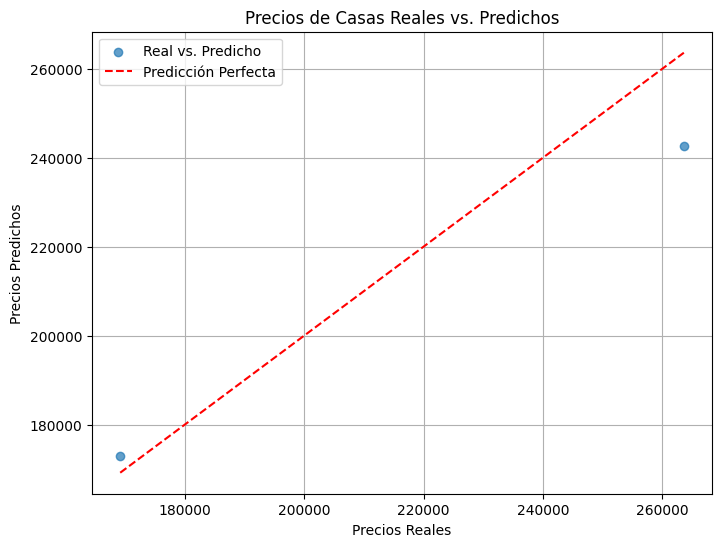

In [21]:
import matplotlib.pyplot as plt

# Crear un diagrama de dispersión de precios reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Real vs. Predicho')

# Añadir una línea de predicción perfecta
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label='Predicción Perfecta')

# Añadir título y etiquetas
plt.title('Precios de Casas Reales vs. Predichos')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

## Tarea Final

### Subtask:
Resumir el rendimiento del modelo, discutir las conclusiones obtenidas y resaltar las limitaciones debido al pequeño conjunto de datos de casas 'nuevas'. Sugerir posibles próximos pasos para la mejora del modelo o la adquisición de más datos para un análisis más robusto.


## Summary:

### Data Analysis Key Findings

*   The dataset, containing house prices, was successfully loaded and inspected from the provided GitHub URL.
*   The data for 'new' houses was split into training and testing sets, ensuring the test set contained at least 2 samples for robust evaluation. Specifically, the training set consisted of 3 samples, and the test set had 2 samples.
*   A Gradient Boosting Regressor model was trained and evaluated, demonstrating strong performance metrics:
    *   R-squared: 0.8986, indicating that approximately 89.86% of the variance in house prices is explained by the model.
    *   Mean Absolute Error (MAE): 12332.07, representing the average absolute difference between predicted and actual prices.
    *   Root Mean Squared Error (RMSE): 15034.97, providing a measure of the typical magnitude of prediction errors.
*   A scatter plot visualizing actual versus predicted house prices on the test set showed a close alignment of predictions with actual values, considering the illustrative nature due to the small dataset.

### Insights or Next Steps

*   **Insight:** While the Gradient Boosting Regressor model shows promising performance with an R-squared of 0.8986 on the current dataset, the extremely small test set (2 samples) means these metrics should be interpreted with caution. The model's generalization capabilities to unseen data might be limited, and the high R-squared could be an artifact of overfitting to the very few available 'new' house examples.
*   **Next Steps:**
    *   Prioritize acquiring more data for 'new' houses to create a larger and more representative dataset for training and robust evaluation.
    *   Explore cross-validation techniques (e.g., K-fold cross-validation), if the dataset size allows, to get a more reliable estimate of the model's performance and reduce the risk of overfitting before deploying the model.
